In [6]:
import pandas as pd
import sys
sys.path.insert(1, "/home/robbe/ionbot")
import OxiAnalysis as OA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Early normalization

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,Unnamed: 0,[1384]Homocysteic_acid[M],[1914]Met->AspSA[M],[1915]Decarboxylation[D],[1915]Decarboxylation[E],[1916]Aspartylurea[H],[1917]Formylasparagine[H],[1918]Carbonyl[A],[1918]Carbonyl[E],[1918]Carbonyl[I],...,[721]4-ONE[C],[721]4-ONE[H],[721]4-ONE[K],[743]4-ONE+Delta:H(-2)O(-1)[C],[743]4-ONE+Delta:H(-2)O(-1)[H],[743]4-ONE+Delta:H(-2)O(-1)[K],[860]G-H1[R],[936]Chlorination[Y],[937]dichlorination[Y],[949]3-deoxyglucosone[R]
0,Intensity_QX01983,0.0,0.000108,0.000042,0.000211,0.0,0.000000,0.000082,0.000135,0.000034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000032,0.0,0.000179
1,Intensity_QX01981_160316090220,0.0,0.000145,0.000043,0.000093,0.0,0.000000,0.000083,0.000127,0.000036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000028,0.0,0.000131
2,Intensity_QX01867,0.0,0.000155,0.000045,0.000128,0.0,0.000036,0.000086,0.000111,0.000047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,0.000102
3,Intensity_QX01870,0.0,0.000148,0.000044,0.000121,0.0,0.000037,0.000087,0.000131,0.000039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000030,0.0,0.000148
4,Intensity_QX01873,0.0,0.000000,0.000045,0.000143,0.0,0.000038,0.000095,0.000150,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000030,0.0,0.000205


In [5]:
X = data.copy()
y = X.pop("Unnamed: 0")


In [6]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [7]:
X_scaled

,[1384]Homocysteic_acid[M],[1914]Met->AspSA[M],[1915]Decarboxylation[D],[1915]Decarboxylation[E],[1916]Aspartylurea[H],[1917]Formylasparagine[H],[1918]Carbonyl[A],[1918]Carbonyl[E],[1918]Carbonyl[I],[1918]Carbonyl[Q],...,[721]4-ONE[C],[721]4-ONE[H],[721]4-ONE[K],[743]4-ONE+Delta:H(-2)O(-1)[C],[743]4-ONE+Delta:H(-2)O(-1)[H],[743]4-ONE+Delta:H(-2)O(-1)[K],[860]G-H1[R],[936]Chlorination[Y],[937]dichlorination[Y],[949]3-deoxyglucosone[R]
0,-1.399968,-1.624412,-1.796871,-1.595820,-1.343411,-0.439678,-1.472416,-1.314987,-1.497069,-1.334105,...,-1.196755,-1.063513,-0.796533,-1.324965,-1.428806,-0.269896,-0.767679,-1.310651,-1.179895,1.886077
1,-1.399968,-1.594911,-1.796262,-1.804462,-1.343411,-0.439678,-1.469246,-1.329567,-1.496471,-1.327607,...,-1.196755,-1.063513,-0.796533,-1.324965,-1.428806,-0.269896,-0.767679,-1.346044,-1.179895,1.040258
2,-1.399968,-1.586829,-1.789337,-1.741600,-1.343411,-0.317297,-1.464485,-1.358501,-1.493321,-1.323889,...,-1.196755,-1.063513,-0.796533,-1.324965,-1.428806,-0.269896,-0.767679,-1.336471,-1.179895,0.534456
3,-1.399968,-1.591806,-1.792469,-1.754180,-1.343411,-0.313186,-1.463171,-1.322267,-1.495727,-1.325916,...,-1.196755,-1.063513,-0.796533,-1.324965,-1.428806,-0.269896,-0.767679,-1.325337,-1.179895,1.339735
4,-1.399968,-1.711076,-1.789199,-1.715286,-1.343411,-0.310570,-1.450029,-1.287970,-1.506667,-1.324599,...,-1.196755,-1.063513,-0.796533,-1.324965,-1.428806,-0.269896,-0.767679,-1.328001,-1.179895,2.335370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,-0.843393,-0.929357,-1.462322,-1.617340,-1.343411,-0.439678,-1.035561,-1.466342,-1.322332,-0.772019,...,-0.521226,-1.063513,-0.796533,-1.324965,-1.428806,-0.269896,-0.767679,-1.600950,-1.179895,-1.254752
637,-1.128912,-1.084949,-1.737061,-1.359827,-1.160119,0.169304,-1.218951,-1.144688,-1.349452,-1.159823,...,-1.196755,-1.063513,-0.796533,-1.324965,-1.428806,-0.269896,-0.767679,-1.159245,-0.453933,-1.254752
638,-0.797198,-1.062883,-1.744717,-1.848370,-0.821372,-0.439678,-1.303720,-1.115909,-1.399041,-1.290527,...,-1.196755,-1.063513,-0.796533,-0.428845,-0.939445,-0.269896,-0.767679,-1.135771,-1.179895,-1.254752
639,-0.806304,-1.139887,-1.794885,-1.357397,-1.078591,-0.218144,-0.777094,-1.075919,-1.268368,-0.808206,...,-0.496344,-1.063513,-0.796533,-1.324965,-1.428806,-0.269896,-0.767679,-1.207535,-1.179895,-1.254752


In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2
0,-10.366379,-3.084473
1,-10.364923,-3.125996
2,-10.318119,-2.941217
3,-10.265827,-3.012019
4,-10.163332,-3.121707


In [9]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)

In [10]:
loadings

,PC1,PC2
[1384]Homocysteic_acid[M],0.116754,0.012276
[1914]Met->AspSA[M],0.151829,-0.028483
[1915]Decarboxylation[D],0.132968,-0.003514
[1915]Decarboxylation[E],0.139671,-0.004859
[1916]Aspartylurea[H],0.091681,0.157964
...,...,...
[743]4-ONE+Delta:H(-2)O(-1)[K],-0.013433,-0.033920
[860]G-H1[R],0.009917,0.244300
[936]Chlorination[Y],0.093981,-0.048453
[937]dichlorination[Y],0.109853,-0.017560


In [11]:
pca_df = pd.concat([X_pca, y], axis=1)

In [12]:
pca_df.loc[0:14, "Project"] = "PXD014381"
pca_df.loc[15:50, "Project"] = "PXD015122"
pca_df.loc[51:539, "Project"] = "PXD012477"
pca_df.loc[540:587, "Project"] = "PXD016278"
pca_df.loc[588:606, "Project"] = "PXD018549"
pca_df.loc[607:612, "Project"] = "PXD022545"
pca_df.loc[613:630, "Project"] = "PXD008050"
pca_df.loc[631:640, "Project"] = "PXD004010"


In [13]:
pca_df

,PC1,PC2,Unnamed: 0,Project
0,-10.366379,-3.084473,Intensity_QX01983,PXD014381
1,-10.364923,-3.125996,Intensity_QX01981_160316090220,PXD014381
2,-10.318119,-2.941217,Intensity_QX01867,PXD014381
3,-10.265827,-3.012019,Intensity_QX01870,PXD014381
4,-10.163332,-3.121707,Intensity_QX01873,PXD014381
...,...,...,...,...
636,-8.386029,-0.484864,Intensity_ad_pl02,PXD004010
637,-8.496120,0.111898,Intensity_ad_pl05,PXD004010
638,-9.247184,-0.189712,Intensity_ad_pl06,PXD004010
639,-8.221998,0.595339,Intensity_ad_pl07,PXD004010


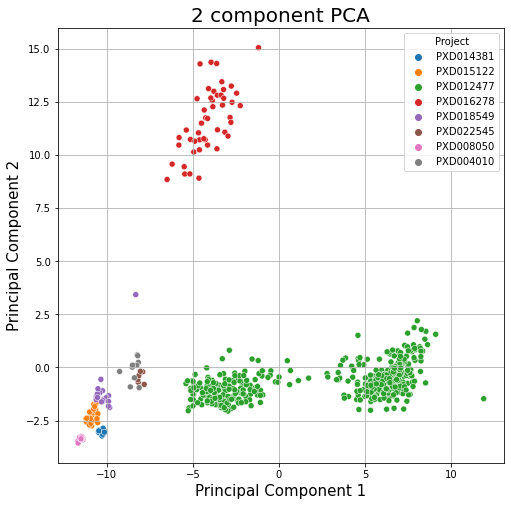

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Project", ax=ax)
ax.grid()

In [15]:
pca_df.to_csv("pca_df.csv")

In [33]:
pca_df_tre = pd.read_csv("/home/robbe/ionbot/PCA_ML/pca_df_with_ann2.csv", sep=";", decimal=",")

In [34]:
pca_df_tre

,Column1,PC1,PC2,Unnamed: 0,Project,Treatment,Timepoint
0,27,-10.647194,-2.315502,Intensity_111017-MCF10A-mAKT-gal-to-gal-wcl-D1-10,PXD015122,mAKT_ltGal,NaN
1,28,-10.766620,-2.386197,Intensity_111017-MCF10A-mAKT-gal-to-gal-wcl-D2-22,PXD015122,mAKT_ltGal,NaN
2,35,-10.722612,-2.189306,Intensity_111017-MCF10A-mAKT-glu-to-gal-wcl-D1-03,PXD015122,mAKT_stGal,NaN
3,36,-10.553190,-2.384550,Intensity_111017-MCF10A-mAKT-glu-to-gal-wcl-D2-15,PXD015122,mAKT_stGal,NaN
4,31,-10.848929,-2.135958,Intensity_111017-MCF10A-mAKT-glu-to-glu-wcl-D1-06,PXD015122,mAKT_ltGlu,NaN
...,...,...,...,...,...,...,...
636,4,-10.163332,-3.121707,Intensity_QX01873,PXD014381,Control,NaN
637,9,-10.227379,-3.149348,Intensity_QX01874,PXD014381,Diamide,NaN
638,1,-10.364923,-3.125996,Intensity_QX01981_160316090220,PXD014381,Control,NaN
639,0,-10.366379,-3.084473,Intensity_QX01983,PXD014381,Control,NaN


In [35]:
pca_df_tre["Treatment"] = pca_df_tre["Treatment"].replace('Healthy', "Control")

In [40]:
pca_df_tre

,Column1,PC1,PC2,Unnamed: 0,Project,Treatment,Timepoint
0,27,-10.647194,-2.315502,Intensity_111017-MCF10A-mAKT-gal-to-gal-wcl-D1-10,PXD015122,mAKT_ltGal,NaN
1,28,-10.766620,-2.386197,Intensity_111017-MCF10A-mAKT-gal-to-gal-wcl-D2-22,PXD015122,mAKT_ltGal,NaN
2,35,-10.722612,-2.189306,Intensity_111017-MCF10A-mAKT-glu-to-gal-wcl-D1-03,PXD015122,mAKT_stGal,NaN
3,36,-10.553190,-2.384550,Intensity_111017-MCF10A-mAKT-glu-to-gal-wcl-D2-15,PXD015122,mAKT_stGal,NaN
4,31,-10.848929,-2.135958,Intensity_111017-MCF10A-mAKT-glu-to-glu-wcl-D1-06,PXD015122,mAKT_ltGlu,NaN
...,...,...,...,...,...,...,...
636,4,-10.163332,-3.121707,Intensity_QX01873,PXD014381,Control,NaN
637,9,-10.227379,-3.149348,Intensity_QX01874,PXD014381,Diamide,NaN
638,1,-10.364923,-3.125996,Intensity_QX01981_160316090220,PXD014381,Control,NaN
639,0,-10.366379,-3.084473,Intensity_QX01983,PXD014381,Control,NaN


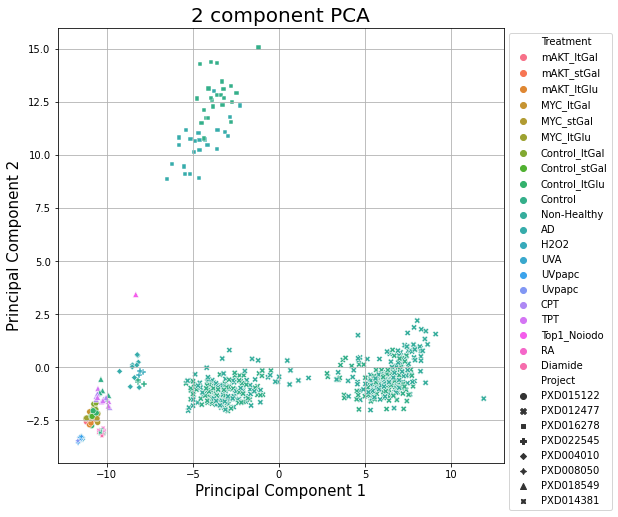

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(data=pca_df_tre, x="PC1", y="PC2", hue="Treatment", ax=ax, style="Project")
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.grid()

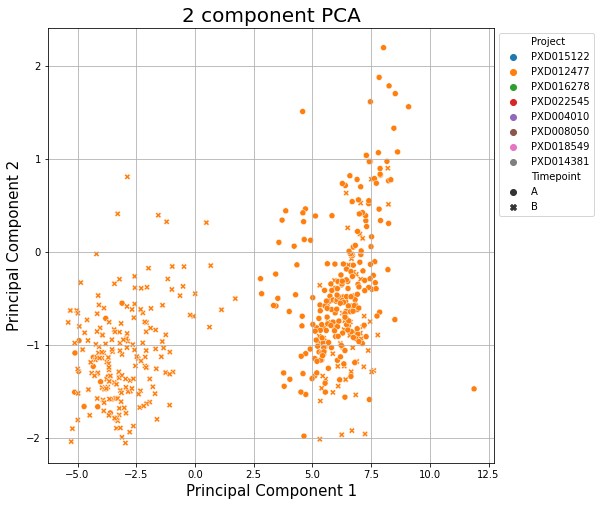

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(data=pca_df_tre, x="PC1", y="PC2", hue="Project", ax=ax, style="Timepoint")
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.grid()

In [20]:
PXD016278 = data[data["Unnamed: 0"].str.contains("JaBa")]

In [21]:
PXD016278.head()

,Unnamed: 0,[1384]Homocysteic_acid[M],[1914]Met->AspSA[M],[1915]Decarboxylation[D],[1915]Decarboxylation[E],[1916]Aspartylurea[H],[1917]Formylasparagine[H],[1918]Carbonyl[A],[1918]Carbonyl[E],[1918]Carbonyl[I],...,[721]4-ONE[C],[721]4-ONE[H],[721]4-ONE[K],[743]4-ONE+Delta:H(-2)O(-1)[C],[743]4-ONE+Delta:H(-2)O(-1)[H],[743]4-ONE+Delta:H(-2)O(-1)[K],[860]G-H1[R],[936]Chlorination[Y],[937]dichlorination[Y],[949]3-deoxyglucosone[R]
540,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...,0.000352,0.001217,0.000430,0.000741,0.000305,0.001412,0.000286,0.000742,0.001683,...,0.000000,0.0,0.000000,0.000000,0.000123,0.0,0.000429,0.000000,0.000000,0.0
541,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...,0.000295,0.000639,0.000325,0.000646,0.000429,0.000641,0.000497,0.000805,0.001923,...,0.000000,0.0,0.000160,0.000000,0.000000,0.0,0.000380,0.000000,0.000000,0.0
542,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...,0.000339,0.001137,0.000649,0.000514,0.000799,0.001100,0.001386,0.001286,0.002065,...,0.000099,0.0,0.000075,0.000099,0.000000,0.0,0.000320,0.000110,0.000111,0.0
543,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...,0.000416,0.000647,0.000384,0.000830,0.000616,0.001170,0.001682,0.001803,0.003057,...,0.000122,0.0,0.000000,0.000112,0.000106,0.0,0.000481,0.000000,0.000000,0.0
544,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...,0.000208,0.000719,0.000179,0.000495,0.000575,0.001145,0.001282,0.001270,0.002161,...,0.000000,0.0,0.000000,0.000065,0.000000,0.0,0.000409,0.000057,0.000000,0.0


In [22]:
X2 = PXD016278.copy()
y2 = X2.pop("Unnamed: 0")

In [23]:
X2_scaled = (X2 - X2.mean(axis=0)) / X2.std(axis=0)

In [24]:
X2_scaled.fillna(0, inplace=True)

In [25]:
pca = PCA(n_components=3)
X2_pca = pca.fit_transform(X2_scaled)

component_names2 = [f"PC{i+1}" for i in range(X2_pca.shape[1])]
X2_pca = pd.DataFrame(X2_pca, columns=component_names2)

X2_pca.head()

,PC1,PC2,PC3
0,-1.607179,0.903531,4.491501
1,-2.618619,0.213728,0.331453
2,2.552633,-2.771090,-0.536108
3,6.141219,-4.441848,-0.010742
4,2.413510,-3.613266,2.820136


In [26]:
pca_df2 = pd.concat([X2_pca.reset_index(drop=True), y2.reset_index(drop=True)], axis=1)

In [27]:
pca_df2.head()

,PC1,PC2,PC3,Unnamed: 0
0,-1.607179,0.903531,4.491501,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...
1,-2.618619,0.213728,0.331453,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...
2,2.552633,-2.771090,-0.536108,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...
3,6.141219,-4.441848,-0.010742,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...
4,2.413510,-3.613266,2.820136,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8...


In [28]:
pca_df2["Treatment"] = pca_df2["Unnamed: 0"].apply(lambda x: "Control" if "ctrl" in x else "AD")

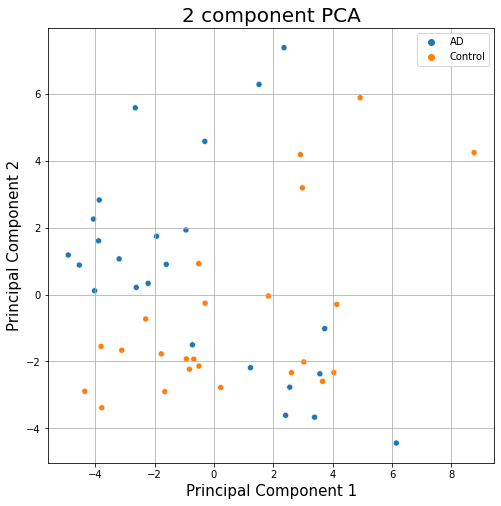

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(data=pca_df2, x="PC1", y="PC2", hue="Treatment", ax=ax)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.grid()

/tmp/ipykernel_569815/4202264397.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pca_df2 = pca_df2.drop('Treatment', 1)


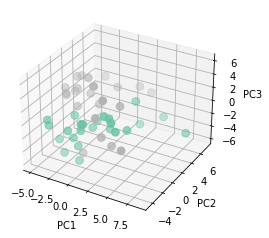

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
#%matplotlib notebook
%matplotlib inline

pca_df2['Treatment']=pd.Categorical(pca_df2['Treatment'])
my_color=pca_df2['Treatment'].cat.codes
pca_df2 = pca_df2.drop('Treatment', 1)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df2['PC1'], pca_df2['PC2'], pca_df2['PC3'], c=my_color, cmap="Set2_r", s=60)
 

 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

In [32]:
pca_df_tre["Treatment"].to_csv("Treatmentrow.csv")

# With additional normalization

In [22]:
datanorm = pd.read_csv("data_additional_normalization.csv")

In [23]:
X = datanorm.copy()
y = X.pop("Unnamed: 0")

In [24]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2
0,-10.366313,-3.084591
1,-10.364915,-3.126076
2,-10.318117,-2.941266
3,-10.265806,-3.012159
4,-10.163309,-3.121787


In [26]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)

In [27]:
pca_df = pd.concat([X_pca, y], axis=1)

In [28]:
pca_df.loc[0:14, "Project"] = "PXD014381"
pca_df.loc[15:50, "Project"] = "PXD015122"
pca_df.loc[51:539, "Project"] = "PXD012477"
pca_df.loc[540:587, "Project"] = "PXD016278"
pca_df.loc[588:606, "Project"] = "PXD018549"
pca_df.loc[607:612, "Project"] = "PXD022545"
pca_df.loc[613:630, "Project"] = "PXD008050"
pca_df.loc[631:640, "Project"] = "PXD004010"

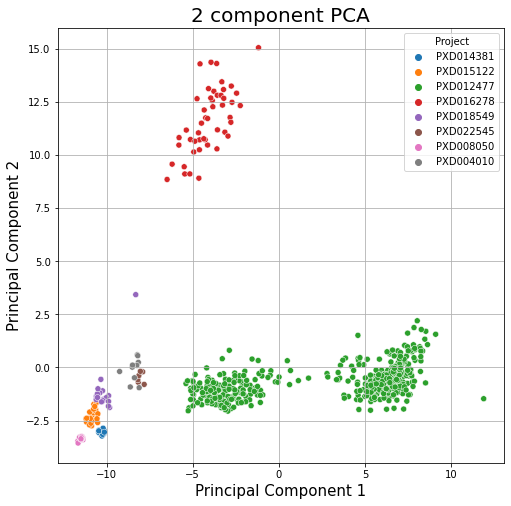

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Project", ax=ax)
ax.grid()